In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import random

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bprovanbessell/SATfeatPy/main/features_csv/all_features.csv?token=GHSAT0AAAAAABQU4OMZVNM7UJFEOOGDAT6CYQ7SWFA')
df

,c,v,clauses_vars_ratio,vars_clauses_ratio,vcg_var_mean,vcg_var_coeff,vcg_var_min,vcg_var_max,vcg_var_entropy,vcg_clause_mean,vcg_clause_coeff,vcg_clause_min,vcg_clause_max,vcg_clause_entropy,vg_mean,vg_coeff,vg_min,vg_max,pnc_ratio_mean,pnc_ratio_coeff,pnc_ratio_min,pnc_ratio_max,pnc_ratio_entropy,pnv_ratio_mean,pnv_ratio_coeff,pnv_ratio_min,pnv_ratio_max,pnv_ratio_entropy,pnv_ratio_stdev,binary_ratio,ternary_ratio,ternary+,hc_fraction,hc_var_mean,hc_var_coeff,hc_var_min,hc_var_max,hc_var_entropy,unit_props_at_depth_1,unit_props_at_depth_4,...,band_weights_val_rate,exo_node_min,exo_node_max,exo_node_mode,exo_node_mean,exo_node_std,exo_node_zeros,exo_node_entropy,exo_node_q1,exo_node_q2,exo_node_q3,exo_node_val_rate,exo_weights_min,exo_weights_max,exo_weights_mode,exo_weights_mean,exo_weights_std,exo_weights_zeros,exo_weights_entropy,exo_weights_q1,exo_weights_q2,exo_weights_q3,exo_weights_val_rate,rwh_0_mean,rwh_0_coeff,rwh_0_min,rwh_0_max,rwh_1_mean,rwh_1_coeff,rwh_1_min,rwh_1_max,rwh_2_mean,rwh_2_coeff,rwh_2_min,rwh_2_max,file_name,satzilla_base_t,satzilla_probe_t,ansotegui_t,alfonso_t
0,608,71,8.563380,0.116776,0.045172,0.173688,0.029605,0.060855,2.802758,0.045172,0.807882,0.028169,0.169014,0.900080,0.040400,0.173361,0.026316,0.054276,0.945945,0.122943,0.500000,1.0,0.881598,0.168685,1.037697,0.000000,0.600000,3.040421,0.175043,0.799342,0.000000,0.799342,0.799342,0.022517,0.188572,0.013158,0.032895,2.268332,0.000000,0.000000,...,1.000000,0,11,0,1.563380,3.672250,0,3.086135,0.0,0.0,0.0,0.845070,1,1,1,1.0,0.0,0,9.665357,1.0,1.0,1.0,1.0,2593817.5,0.957829,109385.0,5078250.0,1056.695041,1.000000,2.981935e-09,2113.390083,1081.900778,1.000000,1.302080e-29,2163.801556,/projects/satdb/dataset_final/sat_matching_80_...,0.021469,3.190207,0.155923,73.221281
1,615,70,8.785714,0.113821,0.049617,0.168633,0.032520,0.069919,2.607264,0.049617,0.864724,0.028571,0.185714,1.009937,0.044274,0.179832,0.029268,0.065041,0.940273,0.125103,0.500000,1.0,1.009937,0.063636,0.698232,0.000000,0.217391,2.514514,0.044433,0.772358,0.000000,0.772358,0.772358,0.022067,0.193981,0.013008,0.032520,2.300678,0.000000,0.000000,...,1.000000,0,0,0,0.000000,0.000000,0,NaN,0.0,0.0,0.0,1.000000,0,0,0,0.0,0.0,0,NaN,0.0,0.0,0.0,1.0,2735475.5,0.999424,1575.0,5469376.0,1207.488426,1.000000,6.927306e-28,2414.976852,1186.623627,1.000000,3.491123e-120,2373.247255,/projects/satdb/dataset_final/sat_matching_80_...,0.026595,3.461776,0.186650,71.619842
2,926,105,8.819048,0.113391,0.033385,0.186444,0.017279,0.047516,3.022879,0.033385,0.862139,0.019048,0.123810,1.035865,0.030423,0.195192,0.015119,0.045356,0.941985,0.122481,0.333333,1.0,1.035865,0.051989,0.861744,0.000000,0.185185,2.403486,0.044801,0.773218,0.001080,0.774298,0.773218,0.014728,0.215652,0.006479,0.022678,2.446603,0.000000,0.000000,...,0.500000,0,0,0,0.000000,0.000000,0,NaN,0.0,0.0,0.0,1.000000,0,0,0,0.0,0.0,0,NaN,0.0,0.0,0.0,1.0,2148522.5,0.999991,20.0,4297025.0,441.327046,1.000000,1.194627e-76,882.654092,474.697562,1.000000,0.000000e+00,949.395124,/projects/satdb/dataset_final/sat_matching_120...,0.036297,3.868897,0.390993,193.343842
3,603,70,8.614286,0.116086,0.049799,0.133441,0.033167,0.063018,2.688342,0.049799,0.821970,0.028571,0.171429,0.985933,0.044302,0.146098,0.029851,0.059701,0.940687,0.121373,0.500000,1.0,0.985933,0.051673,0.688295,0.000000,0.120000,2.171712,0.035566,0.767828,0.000000,0.767828,0.767828,0.021938,0.172462,0.013267,0.031509,2.151035,0.000000,0.000000,...,1.000000,0,0,0,0.000000,0.000000,0,NaN,0.0,0.0,0.0,1.000000,0,0,0,0.0,0.0,0,NaN,0.0,0.0,0.0,1.0,3320858.0,0.999679,1065.0,6640651.0,1181.583331,1.000000,2.437278e-30,2363.166661,1149.059132,1.000000,4.670090e-147,2298.118264,/projects/satdb/dataset_final/sat_matching_80_...,0.025883,3.470889,0.178437,71.508800
4,228,43,5.302326,0.188596,0.067319,0.162581,0.048246,0.087719,2.203308,0.067319,0.498869,0.046512,0.209302,1.182737,0.056100,0.174052,0.039474,0.074561,0.794319,0.413663,0.000000,1.0,1.187327,0.221325,0.691155,0.000000,0.500000,2.919126,0

In [ ]:
satzilla_base = ['c', 'v', 'clauses_vars_ratio', 'vars_clauses_ratio', 'vcg_var_mean', 'vcg_var_coeff', 'vcg_var_min',
                'vcg_var_max', 'vcg_var_entropy', 'vcg_clause_mean', 'vcg_clause_coeff', 'vcg_clause_min', 'vcg_clause_max',
                'vcg_clause_entropy', 'vg_mean', 'vg_coeff', 'vg_min', 'vg_max', 'pnc_ratio_mean', 'pnc_ratio_coeff',
                'pnc_ratio_min', 'pnc_ratio_max', 'pnc_ratio_entropy', 'pnv_ratio_mean', 'pnv_ratio_coeff', 'pnv_ratio_min',
                'pnv_ratio_max', 'pnv_ratio_entropy', 'pnv_ratio_stdev', 'binary_ratio', 'ternary_ratio', 'ternary+',
                'hc_fraction', 'hc_var_mean', 'hc_var_coeff', 'hc_var_min', 'hc_var_max', 'hc_var_entropy']
satzilla_probing = ['unit_props_at_depth_1', 'unit_props_at_depth_4', 'unit_props_at_depth_16', 'unit_props_at_depth_64',
                    'unit_props_at_depth_256', 'mean_depth_to_contradiction_over_vars', 'estimate_log_number_nodes_over_vars',
                    'saps_BestSolution_Mean', 'saps_BestSolution_CoeffVariance', 'saps_FirstLocalMinStep_Mean',
                    'saps_FirstLocalMinStep_CoeffVariance', 'saps_FirstLocalMinStep_Median', 'saps_FirstLocalMinStep_Q.10',
                    'saps_FirstLocalMinStep_Q.90', 'saps_BestAvgImprovement_Mean', 'saps_BestAvgImprovement_CoeffVariance',
                    'saps_FirstLocalMinRatio_Mean', 'saps_FirstLocalMinRatio_CoeffVariance', 'saps_EstACL_Mean',
                    'gsat_BestSolution_Mean', 'gsat_BestSolution_CoeffVariance', 'gsat_FirstLocalMinStep_Mean',
                    'gsat_FirstLocalMinStep_CoeffVariance', 'gsat_FirstLocalMinStep_Median', 'gsat_FirstLocalMinStep_Q.10',
                    'gsat_FirstLocalMinStep_Q.90', 'gsat_BestAvgImprovement_Mean', 'gsat_BestAvgImprovement_CoeffVariance',
                    'gsat_FirstLocalMinRatio_Mean', 'gsat_FirstLocalMinRatio_CoeffVariance', 'gsat_EstACL_Mean']
ansotegui = ['vig_modularty',
             'vig_d_poly', 'cvig_db_poly', 'variable_alpha']
alfonso = ['v_nd_p_node_min', 'v_nd_p_node_max', 'v_nd_p_node_mode',
           'v_nd_p_node_mean', 'v_nd_p_node_std', 'v_nd_p_node_zeros', 'v_nd_p_node_entropy', 'v_nd_p_node_q1',
           'v_nd_p_node_q2', 'v_nd_p_node_q3', 'v_nd_p_node_val_rate', 'v_nd_p_weights_min', 'v_nd_p_weights_max',
           'v_nd_p_weights_mode', 'v_nd_p_weights_mean', 'v_nd_p_weights_std', 'v_nd_p_weights_zeros',
           'v_nd_p_weights_entropy', 'v_nd_p_weights_q1', 'v_nd_p_weights_q2', 'v_nd_p_weights_q3', 'v_nd_p_weights_val_rate',
           'v_nd_n_node_min', 'v_nd_n_node_max', 'v_nd_n_node_mode', 'v_nd_n_node_mean', 'v_nd_n_node_std',
           'v_nd_n_node_zeros', 'v_nd_n_node_entropy', 'v_nd_n_node_q1', 'v_nd_n_node_q2', 'v_nd_n_node_q3',
           'v_nd_n_node_val_rate', 'v_nd_n_weights_min', 'v_nd_n_weights_max', 'v_nd_n_weights_mode', 'v_nd_n_weights_mean',
           'v_nd_n_weights_std', 'v_nd_n_weights_zeros', 'v_nd_n_weights_entropy', 'v_nd_n_weights_q1', 'v_nd_n_weights_q2',
           'v_nd_n_weights_q3', 'v_nd_n_weights_val_rate', 'c_nd_p_node_min', 'c_nd_p_node_max', 'c_nd_p_node_mode',
           'c_nd_p_node_mean', 'c_nd_p_node_std', 'c_nd_p_node_zeros', 'c_nd_p_node_entropy', 'c_nd_p_node_q1',
           'c_nd_p_node_q2', 'c_nd_p_node_q3', 'c_nd_p_node_val_rate', 'c_nd_p_weights_min', 'c_nd_p_weights_max',
           'c_nd_p_weights_mode', 'c_nd_p_weights_mean', 'c_nd_p_weights_std', 'c_nd_p_weights_zeros',
           'c_nd_p_weights_entropy', 'c_nd_p_weights_q1', 'c_nd_p_weights_q2', 'c_nd_p_weights_q3', 'c_nd_p_weights_val_rate',
           'c_nd_n_node_min', 'c_nd_n_node_max', 'c_nd_n_node_mode', 'c_nd_n_node_mean', 'c_nd_n_node_std',
           'c_nd_n_node_zeros', 'c_nd_n_node_entropy', 'c_nd_n_node_q1', 'c_nd_n_node_q2', 'c_nd_n_node_q3',
           'c_nd_n_node_val_rate', 'c_nd_n_weights_min', 'c_nd_n_weights_max', 'c_nd_n_weights_mode', 'c_nd_n_weights_mean',
           'c_nd_n_weights_std', 'c_nd_n_weights_zeros', 'c_nd_n_weights_entropy', 'c_nd_n_weights_q1', 'c_nd_n_weights_q2',
           'c_nd_n_weights_q3', 'c_nd_n_weights_val_rate', 'vg_al_node_min', 'vg_al_node_max', 'vg_al_node_mode',
           'vg_al_node_mean', 'vg_al_node_std', 'vg_al_node_zeros', 'vg_al_node_entropy', 'vg_al_node_q1', 'vg_al_node_q2',
           'vg_al_node_q3', 'vg_al_node_val_rate', 'vg_al_weights_min', 'vg_al_weights_max', 'vg_al_weights_mode',
           'vg_al_weights_mean', 'vg_al_weights_std', 'vg_al_weights_zeros', 'vg_al_weights_entropy', 'vg_al_weights_q1',
           'vg_al_weights_q2', 'vg_al_weights_q3', 'vg_al_weights_val_rate', 'cg_al_node_min', 'cg_al_node_max',
           'cg_al_node_mode', 'cg_al_node_mean', 'cg_al_node_std', 'cg_al_node_zeros', 'cg_al_node_entropy', 'cg_al_node_q1',
           'cg_al_node_q2', 'cg_al_node_q3', 'cg_al_node_val_rate', 'cg_al_weights_min', 'cg_al_weights_max',
           'cg_al_weights_mode', 'cg_al_weights_mean', 'cg_al_weights_std', 'cg_al_weights_zeros', 'cg_al_weights_entropy',
           'cg_al_weights_q1', 'cg_al_weights_q2', 'cg_al_weights_q3', 'cg_al_weights_val_rate', 'rg_node_min', 'rg_node_max',
           'rg_node_mode', 'rg_node_mean', 'rg_node_std', 'rg_node_zeros', 'rg_node_entropy', 'rg_node_q1', 'rg_node_q2',
           'rg_node_q3', 'rg_node_val_rate', 'rg_weights_min', 'rg_weights_max', 'rg_weights_mode', 'rg_weights_mean',
           'rg_weights_std', 'rg_weights_zeros', 'rg_weights_entropy', 'rg_weights_q1', 'rg_weights_q2', 'rg_weights_q3',
           'rg_weights_val_rate', 'big_node_min', 'big_node_max', 'big_node_mode', 'big_node_mean', 'big_node_std',
           'big_node_zeros', 'big_node_entropy', 'big_node_q1', 'big_node_q2', 'big_node_q3', 'big_node_val_rate',
           'big_weights_min', 'big_weights_max', 'big_weights_mode', 'big_weights_mean', 'big_weights_std',
           'big_weights_zeros', 'big_weights_entropy', 'big_weights_q1', 'big_weights_q2', 'big_weights_q3',
           'big_weights_val_rate', 'and_node_min', 'and_node_max', 'and_node_mode', 'and_node_mean', 'and_node_std',
           'and_node_zeros', 'and_node_entropy', 'and_node_q1', 'and_node_q2', 'and_node_q3', 'and_node_val_rate',
           'and_weights_min', 'and_weights_max', 'and_weights_mode', 'and_weights_mean', 'and_weights_std',
           'and_weights_zeros', 'and_weights_entropy', 'and_weights_q1', 'and_weights_q2', 'and_weights_q3',
           'and_weights_val_rate', 'band_node_min', 'band_node_max', 'band_node_mode', 'band_node_mean', 'band_node_std',
           'band_node_zeros', 'band_node_entropy', 'band_node_q1', 'band_node_q2', 'band_node_q3', 'band_node_val_rate',
           'band_weights_min', 'band_weights_max', 'band_weights_mode', 'band_weights_mean', 'band_weights_std',
           'band_weights_zeros', 'band_weights_entropy', 'band_weights_q1', 'band_weights_q2', 'band_weights_q3',
           'band_weights_val_rate', 'exo_node_min', 'exo_node_max', 'exo_node_mode', 'exo_node_mean', 'exo_node_std',
           'exo_node_zeros', 'exo_node_entropy', 'exo_node_q1', 'exo_node_q2', 'exo_node_q3', 'exo_node_val_rate',
           'exo_weights_min', 'exo_weights_max', 'exo_weights_mode', 'exo_weights_mean', 'exo_weights_std',
           'exo_weights_zeros', 'exo_weights_entropy', 'exo_weights_q1', 'exo_weights_q2', 'exo_weights_q3',
           'exo_weights_val_rate', 'rwh_0_mean', 'rwh_0_coeff', 'rwh_0_min', 'rwh_0_max', 'rwh_1_mean', 'rwh_1_coeff',
           'rwh_1_min', 'rwh_1_max', 'rwh_2_mean', 'rwh_2_coeff', 'rwh_2_min', 'rwh_2_max']

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)
df = df.reset_index(drop=True)

In [ ]:
y_sat = []

for path in df['file_name']:
    name = path.split('/')[-1]
    if name[0] == 's':
        y_sat.append(0)
    elif name[0] == 'u':
        y_sat.append(1)

for i in random.sample(range(0,2000), 10):
    print(df['file_name'][i],y_sat[i])

/projects/satdb/dataset_final/sat_cliquecoloring_45_152.cnf 0
/projects/satdb/dataset_final/unsat_tseitin_40_284_86724.cnf 1
/projects/satdb/dataset_final/unsat_op_90_775_91298.cnf 1
/projects/satdb/dataset_final/sat_op_28_119_78821.cnf 0
/projects/satdb/dataset_final/sat_php_182_753_83414.cnf 0
/projects/satdb/dataset_final/unsat_3color_30_100_97350.cnf 1
/projects/satdb/dataset_final/unsat_dominating_80_1810_64806.cnf 1
/projects/satdb/dataset_final/unsat_dominating_40_455_41876.cnf 1
/projects/satdb/dataset_final/sat_cliquecoloring_55_248.cnf 0
/projects/satdb/dataset_final/sat_5clique_50_930_25736.cnf 0


In [ ]:
y_category = []

dictionary = {
    'cliquecoloring' : 0,
    'kclique' : 1,
    'kcolor' : 2,
    'tseitin' : 3,
    'php' : 4,
    'matching' : 5,
    'tiling' : 6,
    'subsetcard' : 7,
    'op' : 8,
    'dominating' : 9
}

for path in df['file_name']:
    name = path.split('/')[-1]
    cat = name.split('_')[1]
    if ('color' in cat) and (cat != 'cliquecoloring'):
        cat = 'kcolor'
    elif ('clique' in cat) and (cat != 'cliquecoloring'):
        cat = 'kclique'
    y_category.append(dictionary[cat])

for i in random.sample(range(0,2000), 10):
    print(df['file_name'][i],y_category[i])

/projects/satdb/dataset_final/sat_5color_100_520_44962.cnf 2
/projects/satdb/dataset_final/sat_4color_200_950_96587.cnf 2
/projects/satdb/dataset_final/unsat_4color_80_460_42664.cnf 2
/projects/satdb/dataset_final/sat_tseitin_20_98_99809.cnf 3
/projects/satdb/dataset_final/sat_5color_100_420_1219.cnf 2
/projects/satdb/dataset_final/sat_php_186_786_78057.cnf 4
/projects/satdb/dataset_final/sat_op_45_249_52302.cnf 8
/projects/satdb/dataset_final/unsat_cliquecoloring_30_143.cnf 0
/projects/satdb/dataset_final/sat_5color_100_420_99893.cnf 2
/projects/satdb/dataset_final/unsat_php_93_841_24423.cnf 4


In [ ]:
def calculate_accuracy_rnd_forest(df, y1):

    X = df  # Features
    y = y1 # Target variable
    scaler = MinMaxScaler()
    x1 = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=100)

    clf = RandomForestClassifier(n_estimators=100)

    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    score = metrics.accuracy_score(y_test, y_pred)
    return clf, score

In [ ]:
def calculate_accuracy_xgboost(df, y1):

    X = df  # Features
    y = y1 # Target variable
    scaler = MinMaxScaler()
    x1 = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=100)

    xgb_clf = XGBClassifier(verbosity = 0)

    clf = xgb_clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    score = metrics.accuracy_score(y_test, y_pred)
    return clf, score

In [ ]:
satzilla = satzilla_base + satzilla_probing
all = satzilla_base + satzilla_probing + ansotegui + alfonso

features_list = [satzilla_base, satzilla, ansotegui, alfonso, all]
name_features = ['satzilla_base', 'full_satzilla', 'antonsegui', 'alfonso', 'all']

print("RANDOM FOREST: ")
for i,features in enumerate(features_list):
    clf, accuracy_sat = calculate_accuracy_rnd_forest(df[features], y_sat)
    clf, accuracy_cat = calculate_accuracy_rnd_forest(df[features], y_category)
    print("SAT/UNSAT Accuracy for " + name_features[i] + ": ",accuracy_sat)
    print("Category Accuracy for " + name_features[i] + ": ",accuracy_cat)

RANDOM FOREST: 
SAT/UNSAT Accuracy for satzilla_base:  0.9060773480662984
Category Accuracy for satzilla_base:  0.994475138121547
SAT/UNSAT Accuracy for full_satzilla:  0.9986187845303868
Category Accuracy for full_satzilla:  0.994475138121547
SAT/UNSAT Accuracy for antonsegui:  0.8425414364640884
Category Accuracy for antonsegui:  0.9392265193370166
SAT/UNSAT Accuracy for alfonso:  0.9074585635359116
Category Accuracy for alfonso:  0.9986187845303868
SAT/UNSAT Accuracy for all:  0.9972375690607734
Category Accuracy for all:  0.9986187845303868


# K - Fold Cross-validation

In [ ]:
def k_cross_validation(n_splits, n_repeats, algorithm, df, y1):

    X = df
    y = y1
    scaler = MinMaxScaler()
    x1 = scaler.fit_transform(X)
    cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    scores = cross_val_score(algorithm, x1, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
    # np.save('scores_10fold_satzilla_full_test.npy', scores)
    mean = np.mean(scores)
    std = np.std(scores)
    return scores, mean, std

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
xgb_clf = XGBClassifier(verbose=0)


print("RANDOM FOREST: ")
for i,features in enumerate(features_list):
    scores_sat, mean_sat, std_sat = k_cross_validation(10, 10, clf, df[features], y_sat)
    scores_cat, mean_cat, std_cat = k_cross_validation(10, 10, clf, df[features], y_category)
    print('SAT/UNSAT Accuracy ' + name_features[i] + ' : %.3f (%.3f)' % (mean_sat, std_sat))
    print('SAT/UNSAT Accuracy ' + name_features[i] + ' : %.3f (%.3f)' % (mean_cat, std_cat))


print("XGBOOST: ")
for i,features in enumerate(features_list):
    scores_sat, mean_sat, std_sat = k_cross_validation(10, 10, xgb_clf, df[features], y_sat)
    scores_cat, mean_cat, std_cat = k_cross_validation(10, 10, xgb_clf, df[features], y_category)
    print('SAT/UNSAT Accuracy ' + name_features[i] + ' : %.3f (%.3f)' % (mean_sat, std_sat))
    print('SAT/UNSAT Accuracy ' + name_features[i] + ' : %.3f (%.3f)' % (mean_cat, std_cat))

RANDOM FOREST: 
SAT/UNSAT Accuracy satzilla_base : 0.921 (0.015)
SAT/UNSAT Accuracy satzilla_base : 0.998 (0.003)
SAT/UNSAT Accuracy full_satzilla : 0.996 (0.004)
SAT/UNSAT Accuracy full_satzilla : 0.998 (0.002)
SAT/UNSAT Accuracy antonsegui : 0.872 (0.021)
SAT/UNSAT Accuracy antonsegui : 0.939 (0.015)
SAT/UNSAT Accuracy alfonso : 0.931 (0.016)
SAT/UNSAT Accuracy alfonso : 0.999 (0.002)


KeyboardInterrupt: ignored

# Features Importance Plot

In [ ]:
def features_importance(df, y1, features, name_features, plttype):

    X = df  # Features
    y = y1 # Target variable
    scaler = MinMaxScaler()
    x1 = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=100)

    clf = RandomForestClassifier(n_estimators=100)

    clf = clf.fit(X_train,y_train)

    importances = clf.feature_importances_
    # Sort feature importances in descending order
    indices = np.argsort(importances)
    # Rearrange feature names so they match the sorted feature importances
    names = [features[i] for i in indices]

    feat_importances = pd.Series(importances, index=names)
    x = feat_importances.nlargest(10).sort_values(ascending=True)

    # Barplot: Add bars
    plt.figure(figsize=(10,5))
    plt.barh(range(x.shape[0]), x)
    # Add feature names as x-axis labels
    plt.yticks(range(x.shape[0]), x.keys(), rotation=0, fontsize = 15)
    # Create plot title
    plt.title("feature importance for " + plttype + " classification - "+str(name_features))
    # Show plot
    plt.show()

In [ ]:
for i,features in enumerate(features_list):
    features_importance(df[features],y_sat, features, name_features[i], 'SAT/UNSAT')

In [ ]:
for i,features in enumerate(features_list):
    features_importance(df[features],y_category, features, name_features[i],  'category')

# Feature Computation Time Graph

In [ ]:
df_rand = pd.read_csv('https://raw.githubusercontent.com/bprovanbessell/SATfeatPy/main/features_csv/rand_features.csv?token=GHSAT0AAAAAABQU4OMYHW6IZXQ7CI5VELQAYRAUJEQ')
df_rand["c"].describe()

count     290.000000
mean      625.686207
std       349.743606
min        37.000000
25%       334.000000
50%       625.500000
75%       920.000000
max      1218.000000
Name: c, dtype: float64

In [ ]:
cnf_size = []

for path in df_rand['file_name']:
    name = path.split('/')[-1]
    tokens = name.split('_')
    # size = int(tokens[2])+int(tokens[3])
    size = int(tokens[2])
    cnf_size.append(size)

for i in random.sample(range(0,100), 10):
    print(df_rand['file_name'][i],cnf_size[i])

/projects/satdb/random/sat_rand3cnf_230_966_39063.cnf 230
/projects/satdb/random/unsat_rand3cnf_30_126_86361.cnf 30
/projects/satdb/random/sat_rand3cnf_70_294_31942.cnf 70
/projects/satdb/random/unsat_rand3cnf_210_882_86361.cnf 210
/projects/satdb/random/unsat_rand3cnf_120_504_86241.cnf 120
/projects/satdb/random/sat_rand3cnf_250_1050_718.cnf 250
/projects/satdb/random/sat_rand3cnf_230_966_718.cnf 230
/projects/satdb/random/sat_rand3cnf_240_1008_31942.cnf 240
/projects/satdb/random/sat_rand3cnf_70_294_718.cnf 70
/projects/satdb/random/sat_rand3cnf_90_378_86241.cnf 90


In [ ]:
def get_mean_std(X,Y):
    Z = [x for _,x in sorted(zip(Y,X), key=lambda pair : pair[0])]
    Z = np.reshape(Z, (29,10))
    Y.sort()
    Y = np.reshape(Y, (29,10))

    x = []
    y = []
    std = []
    for i in range(29):
        x.append(Y[i][0])
        y.append(np.mean(Z[i]))
        std.append(np.std(Z[i]))

    return x,y,std

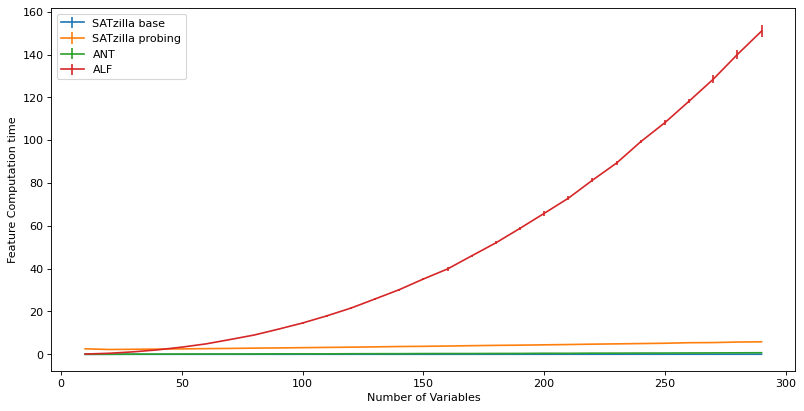

In [ ]:
timing = ['satzilla_base_t', 'satzilla_probe_t', 'ansotegui_t', 'alfonso_t']
timing_names = ["SATzilla base", "SATzilla probing", "ANT", "ALF"]


plt.figure(figsize = (12, 6), dpi = 80)
for i, time in enumerate(timing):
    Y = cnf_size.copy()
    X = df_rand[time]
    x,y,std = get_mean_std(X,Y)
    if time == 'satzilla_probe_t':
      std[0] = std[1]
    plt.errorbar(x, y, yerr=std, label=timing_names[i])
plt.legend(loc='upper left')

plt.xlabel("Number of Variables")
plt.ylabel("Feature Computation time")
plt.savefig("time_v_size", bbox_inches="tight")
plt.show()

In [ ]:
techniques = ['satzilla_base_t', 'satzilla_probe_t', 'ansotegui_t', 'alfonso_t']

x_label = "Number of Clauses"
y_label = "Computational Time"
caption = "Computational time over the number of variables."
print("\\begin{figure}\n\t\\centering\n\\begin{tikzpicture}[scale = 0.95]\n\\pgfplotsset{every axis legend/.append " +
      "style={at={(1.05,0.5)}, anchor=west}}\n\\begin{axis}[xlabel={" + x_label+ "}, ylabel={" + y_label + "}]")

df_time = df_rand.groupby("c").mean()
df_time_min = df_rand.groupby("c").min()
df_time_max = df_rand.groupby("c").max()

for t in techniques:
  line = "\\addplot coordinates{\n"
  for x, y, mi, ma in zip(df_time.index, df_time[t], df_time_min[t], df_time_max[t]):
    #line += "(" + str(x) + "," + str(y) + ") +=(0," + str(round(ma - y,2)) + ") -=(0," + str(round(y - mi,2)) + ")\t"
    line += "(" + str(x) + "," + str(y) + ")\t"
  line += "\n};"
  print(line)
line = "\\legend{"
for t in techniques:
    line += t + ","
line = line[:-1]
line += "}"
print(line)
print("\\end{axis}\n\end{tikzpicture}\n\\caption{" + caption + "}\n\\label{fig:ch5prune_perc}\n\\end{figure}")


\begin{figure}
	\centering
\begin{tikzpicture}[scale = 0.95]
\pgfplotsset{every axis legend/.append style={at={(1.05,0.5)}, anchor=west}}
\begin{axis}[xlabel={Number of Clauses}, ylabel={Computational Time}]
\addplot coordinates{
(37,0.0033948421478271)	(38,0.0033624172210693)	(39,0.0029730796813964)	(42,0.0036978040422711573)	(79,0.0057768821716308)	(82,0.0057165622711181)	(83,0.0047197341918945)	(84,0.005441665649414014)	(121,0.0078538656234741)	(123,0.0075814723968505)	(124,0.0078992843627929)	(125,0.008829116821289)	(126,0.00722923278808586)	(163,0.011365413665771401)	(165,0.009263515472412099)	(166,0.0091292858123779)	(167,0.008073091506958001)	(168,0.011570294698079367)	(206,0.0123844146728515)	(207,0.0141057968139648)	(208,0.010320425033569267)	(209,0.01154243946075435)	(210,0.011184215545654267)	(247,0.0113768577575683)	(249,0.0114905834197998)	(250,0.011879285176595)	(251,0.01222258806228635)	(252,0.0143358707427978)	(291,0.0146167278289794)	(292,0.014366328716278)	(293,0.0136

In [ ]:

    Y = df_rand["c"]
    X = df_rand[time]
    x,y,std = get_mean_std(X,Y)
    plt.errorbar(x, y, yerr=std, label=time)
plt.legend(loc='upper right')
plt.show()



print("\n\nPlot the pruning perc time CH6 \n")
solvers = ["SDP", "BnB", "BnB-Guided"]
solvers_nr = [0,2,3,4]
for time in timing:
    line = "\\addplot coordinates{\n"
    for p, n in enumerate(n_list):
        if 0 < np.mean(results[p, :, :, j, 0]) < 20000:
            line += "(" + str(n) + "," + str(round(np.mean(results[p, :, :, j, 0]),2)) + ") +=(0," + str(round(np.max(results[p, :, :, j, 0]) - np.mean(results[p, :, :, j, 0]),2)) + ") -=(0," + str(round(np.mean(results[p, :, :, j, 0]) - np.min(results[p, :, :, j, 0]),2)) + ")\t"
    line += "\n};"
    print(line)

line = "\\legend{"
for i in solvers:
    line += i + ","
line = line[:-1]
line += "}"
print(line)
print("\\end{axis}\n\end{tikzpicture}\n\\caption{" + caption + "}\n\\label{fig:ch5prune_perc}\n\\end{figure}")




IndentationError: ignored

In [ ]:
df_rand["c"].describe()

count     290.000000
mean      625.686207
std       349.743606
min        37.000000
25%       334.000000
50%       625.500000
75%       920.000000
max      1218.000000
Name: c, dtype: float64